<a href="https://colab.research.google.com/github/T-adnane/Stock_Market_Prediction/blob/main/Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import yfinance as yf

In [4]:
sp500 = yf.Ticker("^GSPC")

In [5]:
sp500 = sp500.history(period="max")

In [6]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-02-09 00:00:00-05:00,4144.250000,4156.229980,4069.669922,4081.500000,4270200000,0.0,0.0
2023-02-10 00:00:00-05:00,4068.919922,4094.360107,4060.790039,4090.459961,3891520000,0.0,0.0
2023-02-13 00:00:00-05:00,4096.620117,4138.899902,4092.669922,4137.290039,3448620000,0.0,0.0


In [7]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-02-02 00:00:00-05:00', '2023-02-03 00:00:00-05:00',
               '2023-02-06 00:00:00-05:00', '2023-02-07 00:00:00-05:00',
               '2023-02-08 00:00:00-05:00', '2023-02-09 00:00:00-05:00',
               '2023-02-10 00:00:00-05:00', '2023-02-13 00:00:00-05:00',
               '2023-02-14 00:00:00-05:00', '2023-02-15 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=23896, freq=None)

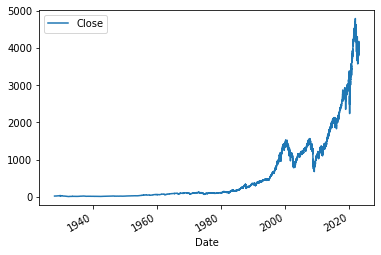

In [8]:
sp500.plot.line(y="Close", use_index=True)

In [10]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [12]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [15]:
sp500["Target"] = (sp500["Tomorrow"]>sp500["Close"]).astype(int)

In [16]:
sp500 = sp500.loc["1990-01-01":].copy()

In [17]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-02-09 00:00:00-05:00,4144.250000,4156.229980,4069.669922,4081.500000,4270200000,4090.459961,1
2023-02-10 00:00:00-05:00,4068.919922,4094.360107,4060.790039,4090.459961,3891520000,4137.290039,1
2023-02-13 00:00:00-05:00,4096.620117,4138.899902,4092.669922,4137.290039,3448620000,4136.129883,0


In [30]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, min_samples_split=100, random_state=1)
train =sp500.iloc[:-100]
test = sp500.iloc[-100:]
predictors = ["Close", "Volume","Open","High","Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, n_estimators=1000, random_state=1)

In [31]:
from sklearn.metrics import precision_score
preds = model.predict(test[predictors])

In [32]:
import pandas as pd
preds = pd.Series(preds, index=test.index)

In [33]:
precision_score(test["Target"], preds)

0.38333333333333336

In [34]:
combined = pd.concat([test["Target"], preds], axis=1)

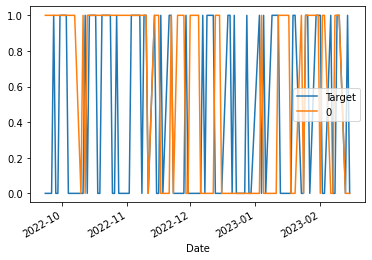

In [36]:
combined.plot()

In [38]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds, index=test.index, name="Predictions")
  combined = pd.concat([test["Target"], preds], axis=1)
  return combined

In [39]:
def backtest(data, model, predictors, start=2500, step=250):
  all_predictions= []
  for i in range(start, data.shape[0], step):
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()
    predictions = predict(train, test, predictors, model)
    all_predictions.append(predictions)
  return pd.concat(all_predictions)

In [40]:
predictions = backtest(sp500, model, predictors)

In [41]:
predictions["Predictions"].value_counts()

0    3354
1    2492
Name: Predictions, dtype: int64

In [42]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5304975922953451

In [43]:
predictions["Target"].value_counts()/predictions.shape[0]

1    0.53404
0    0.46596
Name: Target, dtype: float64

In [44]:
horizons = [2,5,60,250,1000]
new_predictors = []
for horizon in horizons:
  rolling_averages = sp500.rolling(horizon).mean()
  ratio_column = f"Close_Ratio_{horizon}"
  sp500[ratio_column] = sp500["Close"]/rolling_averages["Close"]
  trend_column = f"Trend_{horizon}"
  sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
  new_predictors += [ratio_column, trend_column]

In [46]:
sp500 = sp500.dropna()

In [47]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-08 00:00:00-05:00,4153.470215,4156.850098,4111.669922,4117.859863,4029820000,4081.500000,0,0.994429,1.0,0.994211,2.0,1.038017,27.0,1.019690,110.0,1.122772,535.0
2023-02-09 00:00:00-05:00,4144.250000,4156.229980,4069.669922,4081.500000,4270200000,4090.459961,1,0.995566,0.0,0.990130,1.0,1.028469,26.0,1.011110,110.0,1.112462,535.0
2023-02-10 00:00:00-05:00,4068.919922,4094.360107,4060.790039,4090.459961,3891520000,4137.290039,1,1.001096,1.0,0.994525,2.0,1.030150,27.0,1.013659,111.0,1.114510,535.0


In [48]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [49]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict_proba(test[predictors])[:,1]
  preds[preds >= .6] = 1
  preds[preds < .6] = 0
  preds = pd.Series(preds, index=test.index, name="Predictions")
  combined = pd.concat([test["Target"], preds], axis=1)
  return combined

In [50]:
predictions = backtest(sp500, model, new_predictors)

In [51]:
predictions["Predictions"].value_counts()

0.0    4032
1.0     813
Name: Predictions, dtype: int64

In [52]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5694956949569495